In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## Run code on qlua output

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
# job_num = 16142
job_num = 16165
base = './output/' + cfgbase + '_' + str(job_num)

# base = './output/p2222_cfg200'    #just run with one configuration for comparison

props, threepts = analysis.readfile(base)

V = analysis.get_hypervolume()

In [3]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [4]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()

In [5]:
Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
# Z = analysis.get_Z(Zq, Γ, Γ_B)

In [6]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

Two point
[[[[ 9.98861094e+04-3.19744231e-14j  1.87844925e+02+4.18859291e+01j
    -4.80073203e+04+2.07149805e+04j -4.81476758e+04-4.86502422e+04j]
   [-5.58178772e+02+1.08479614e+02j -1.32562897e+02-2.29394779e+01j
     5.66263000e+02+5.60115723e+02j  2.17583313e+02-3.65698814e+00j]
   [-1.80877716e+02+5.34164352e+01j -4.37233849e+01+2.06567574e+01j
     3.04898010e+02-1.73300323e+02j -3.85501892e+02+9.50022766e+02j]]

  [[ 1.87844925e+02-4.18859291e+01j  9.99820859e+04-1.52766688e-13j
    -4.82640703e+04+4.87579922e+04j  4.78481055e+04+2.07060625e+04j]
   [ 1.42660589e+01-1.34625427e+02j -7.09217896e+02+9.77584763e+01j
     2.69652222e+02-7.74395264e+02j -1.40151184e+02+2.41751724e+02j]
   [ 2.84370060e+01-5.62200623e+01j -2.86222504e+02-9.24288406e+01j
    -9.59993835e+02-4.80024567e+02j -1.96467533e+01-3.24320099e+02j]]

  [[ 4.80073203e+04+2.07149805e+04j  4.82640703e+04+4.87579922e+04j
     9.99343672e+04+8.34887715e-14j  2.26929016e+01+3.14033146e+01j]
   [-1.45167862e+02+1.09549

In [7]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p1112': (-11.164053+5.2576916e-09j), 'p1114': (-14.794744+8.251625e-09j), 'p1116': (-16.796991-4.1534296e-08j), 'p1118': (-18.741304+2.9346635e-08j), 'p11110': (-21.24911+3.514858e-08j), 'p11112': (-24.813286-3.2629888e-08j), 'p11114': (-30.136835+7.076703e-08j), 'p11116': (-38.56354-6.3538295e-08j), 'p2222': (-8.387826+5.5054157e-09j), 'p2224': (-11.93257+3.9616115e-08j), 'p2226': (-14.50041+5.2901687e-08j), 'p2228': (-16.74845-5.045552e-09j), 'p22210': (-19.306978-3.5113217e-08j), 'p22212': (-22.696993-1.6740865e-08j), 'p22214': (-27.587044-6.2909585e-08j), 'p22216': (-35.189648-3.5009556e-08j), 'p3334': (-10.553062+1.1028548e-08j), 'p3336': (-13.030288-3.3414985e-08j), 'p3338': (-15.363631-4.8472057e-08j), 'p33310': (-17.9534+7.870683e-09j), 'p33312': (-21.262197+1.86432e-08j), 'p33314': (-25.913763-2.5203995e-08j), 'p33316': (-33.014706+3.616144e-08j), 'p4444': (-10.68062+2.1592655e-08j), 'p4446': (-12.764243+2.6598789e-08j), 'p4448': (-14.934856+2.050735e-08j), 'p44410': (-17.43

<IPython.core.display.Javascript object>


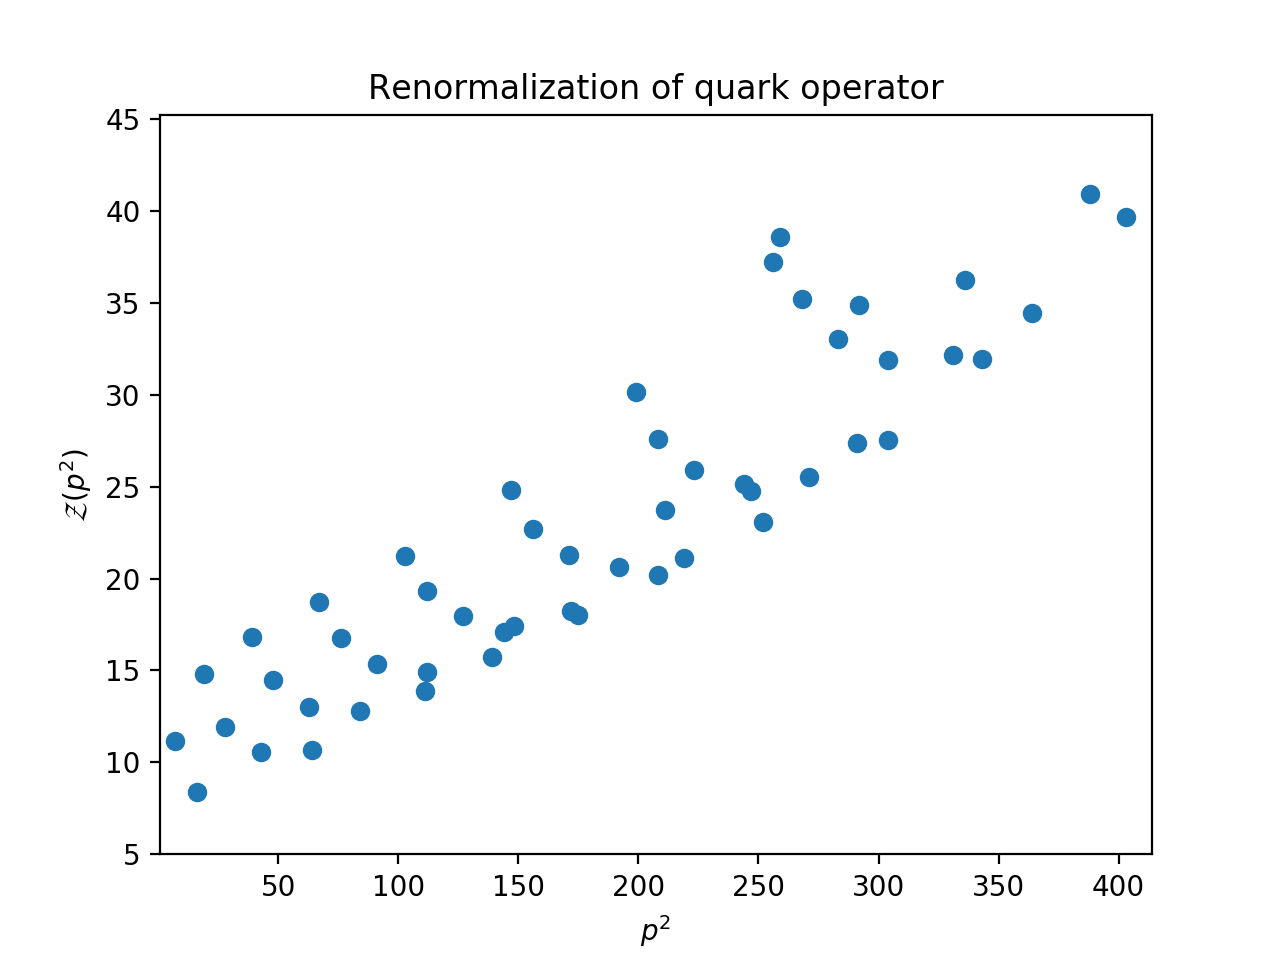

In [8]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$p^2$')
plt.title('Renormalization of quark operator')
plt.show()

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_16142/renorm_constant_zoomed_error.png')

In [ ]:
Z['p2222'].shape

In [ ]:
cfg_list, err, means = analysis.error_analysis(Z, 4, 4)

In [ ]:
Z['p2222']

In [ ]:
plt.figure()
plt.scatter(cfg_list, err)
plt.title('Error scaling at p = [2, 2, 2, 2]')
plt.xlabel('Number configurations')
plt.ylabel('Error')
plt.ylim((.0004, .002))
plt.show()